**Titanic is one of the most big disaster in the history in 1912. It sank after hitting the iceberg. 2224 passengers and employees are died.**

In [868]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [869]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_PassengerID=test_df['PassengerId']

In [870]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000000000000,0,0,211536,13.000000000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000000000000,0,0,112053,30.000000000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.449999999999999,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000000000000,0,0,111369,30.000000000000000,C148,C


In [871]:
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,NaN,S
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C105,C
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,NaN,S
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,NaN,S


In [872]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=>>> There are total 12 columns.

In [873]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S


In [874]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,NaN,S
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C105,C
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,NaN,S
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,NaN,S
1308,1309,nan,3,"Peter, Master. Michael J",male,nan,1,1,2668,22.358300000000000,NaN,C


In [875]:
print("There are ratios of nun values:")
print("--"*30)
train_df.isnull().sum()*100/train_df.shape[0]

There are ratios of nun values:
------------------------------------------------------------


PassengerId    0.000000000000000
Survived      31.932773109243698
Pclass         0.000000000000000
Name           0.000000000000000
Sex            0.000000000000000
Age           20.091673032849503
SibSp          0.000000000000000
Parch          0.000000000000000
Ticket         0.000000000000000
Fare           0.076394194041253
Cabin         77.463712757830407
Embarked       0.152788388082506
dtype: float64

=>>> We can drop PassengerId,Cabin and Ticket columns.

In [876]:
train_df.drop(labels = ["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)

In [877]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

=>>> There are 9 columns, now.

In [878]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S


In [879]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000000000000,1309.000000000000000,1046.000000000000000,1309.000000000000000,1309.000000000000000,1308.000000000000000
mean,0.383838383838384,2.294881588999236,29.881137667304014,0.498854087089381,0.385026737967914,33.295479281345600
std,0.486592454264858,0.837836018970132,14.413493211271334,1.041658390596098,0.865560275349513,51.758668239174142
min,0.000000000000000,1.000000000000000,0.170000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,2.000000000000000,21.000000000000000,0.000000000000000,0.000000000000000,7.895800000000000
50%,0.000000000000000,3.000000000000000,28.000000000000000,0.000000000000000,0.000000000000000,14.454200000000000
75%,1.000000000000000,3.000000000000000,39.000000000000000,1.000000000000000,0.000000000000000,31.274999999999999
max,1.000000000000000,3.000000000000000,80.000000000000000,8.000000000000000,9.000000000000000,512.329200000000014


=>>> mean and %50 value of Age are so similar. There is no skewed distribution.

=>>> mean and %50 value of Fare are not so similar. There is a skewed distribution.

In [880]:
# show the overall survival rate, as the standard when choosing the fts
print('Overall Survival Ratio: %{}'.format(round(train_df['Survived'].mean()*100,2)))

Overall Survival Ratio: %38.38


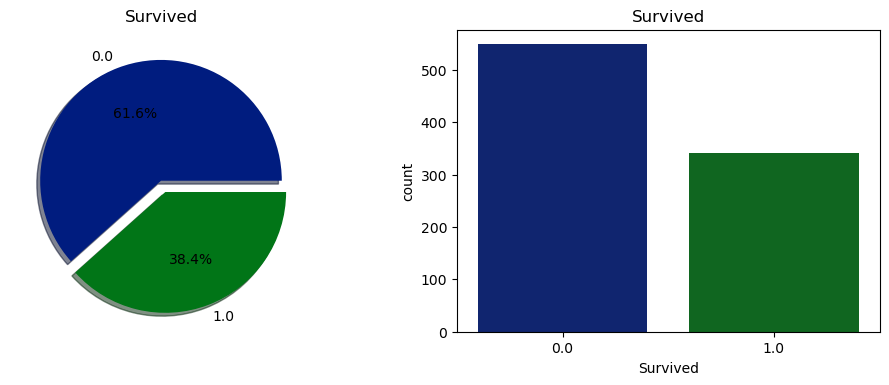

In [881]:
f,ax=plt.subplots(1,2,figsize=(12,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

% 38,4 of passengers are survived, % 61,6 of passengers died.

In [882]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


=>>> Dataset has 3 float64, 3 int64, 3 object column dtype.

float64 : Fare and Age

int64: Pclass, SibSp, Parch, PassengerID, and Survived

object : Name, Sex, and Embarked

Survived, Age, Fare, Embarked  columns have missing values.

In [883]:
train_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

We have 148 Null Survived,

263 Age,

1 Fare,

2 Embarked values.

=>>> For dividing categorical and numerical values:

In [884]:
train_df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Fare         281
Embarked       3
dtype: int64

**Categorical Variable Analysis** : Survived, Pclass, Sex, SibsSp, Parch, Embarked, Name

**Numerical Variable Analysis** : Age, Fare

**Categorical Variable Analysis- Visualize**

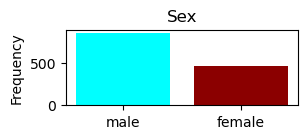

Sex: 
 male      843
female    466
Name: Sex, dtype: int64


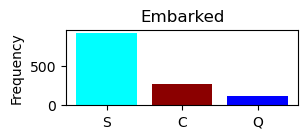

Embarked: 
 S    914
C    270
Q    123
Name: Embarked, dtype: int64


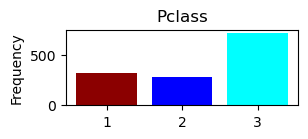

Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


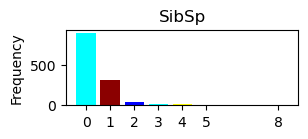

SibSp: 
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


In [885]:
def bar_plot(i):
    var= train_df[i]
    varValue=var.value_counts()
    plt.figure(figsize=(3,1))
    plt.bar(varValue.index, varValue, color=["cyan", "darkred", "blue", "yellow"])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
    print('{}: \n {}'.format(i,varValue))
Firstcategory=[ 'Sex', 'Embarked', 'Pclass', 'SibSp']
for c in Firstcategory:
    bar_plot(c)

**Numerical Variable Analysis - Visualize**

Text(0.5, 1.0, 'Age')

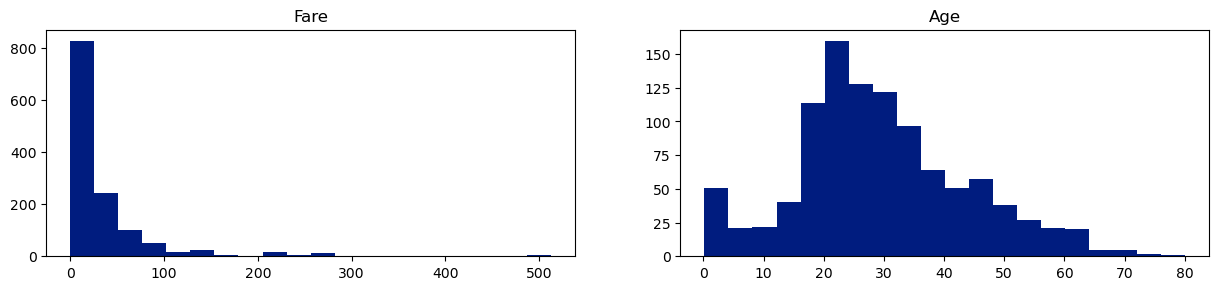

In [886]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
plt.hist(train_df['Fare'], bins=20)
plt.title("Fare")
plt.subplot(1,2,2)
plt.hist(train_df['Age'], bins=20)
plt.title("Age")

=>>> Age likes positively skewed

# Pclass vs Survived

In [887]:
#Pclass vs Survived
print(train_df[['Pclass', 'Survived']].head(10))
print("Survived people ratio groupby Pclass: \n", train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass          Survived
0       3 0.000000000000000
1       1 1.000000000000000
2       3 1.000000000000000
3       1 1.000000000000000
4       3 0.000000000000000
5       3 0.000000000000000
6       1 0.000000000000000
7       3 0.000000000000000
8       3 1.000000000000000
9       2 1.000000000000000
Survived people ratio groupby Pclass: 
    Pclass          Survived
0       1 0.629629629629630
1       2 0.472826086956522
2       3 0.242362525458248


=>>> Ratio of survived passenger is the most value in 1.pclass.

# Survived vs Sex

In [888]:
#Survived people ratio groupby Sex:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex          Survived
0  female 0.742038216560510
1    male 0.188908145580589


=>>> Number of survived female passengers are more than survived male passenger.

# Survived vs SibSp

In [889]:
#Survived people ratio groupby Siblings/Spouse :
sursibsp=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sursibsp

,SibSp,Survived
1,1,0.535885167464115
2,2,0.464285714285714
0,0,0.345394736842105
3,3,0.250000000000000
4,4,0.166666666666667
5,5,0.000000000000000
6,8,0.000000000000000


=>>> Passengers who have 1 sibling/suppose have the most value of survived rate. Passengers that have 5 or 8 sibsp are not survived or there is no possibility of having sibsp.

# Survived vs Parch

In [890]:
#Survived people ratio groupby Parch ( Parent or children) : 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000000000000
1,1,0.550847457627119
2,2,0.500000000000000
0,0,0.343657817109145
5,5,0.200000000000000
4,4,0.000000000000000
6,6,0.000000000000000
7,9,nan


=>>> If a passenger has 3 children or parents, the survived rate is highest.

#**Outlier Detection**

# 1. MISSING VALUES

**Find and fill the missing value:**

In [891]:
#Finding missing values:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [892]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000000000000,-0.338481035961016,-0.077221094572177,-0.035322498885736,0.081629407083482,0.257306522384962
Pclass,-0.338481035961016,1.000000000000000,-0.408106234236445,0.060832007574908,0.018322202009787,-0.558628732327172
Age,-0.077221094572177,-0.408106234236445,1.000000000000000,-0.243698997664770,-0.150917090363543,0.178739855999641
SibSp,-0.035322498885736,0.060832007574908,-0.243698997664770,1.000000000000000,0.373587190626489,0.160238255914952
Parch,0.081629407083482,0.018322202009787,-0.150917090363543,0.373587190626489,1.000000000000000,0.221538658548192
Fare,0.257306522384962,-0.558628732327172,0.178739855999641,0.160238255914952,0.221538658548192,1.000000000000000


# 1.1. Embarked missing values

In [893]:
#Embarked missing
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1.000000000000000,1,"Icard, Miss. Amelie",female,38.000000000000000,0,0,80.000000000000000,NaN
829,1.000000000000000,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000000000000,0,0,80.000000000000000,NaN


We have 1 Pclass. Pclass has the most correlation factor is 0.558629 with Fare.

<Figure size 1500x500 with 0 Axes>

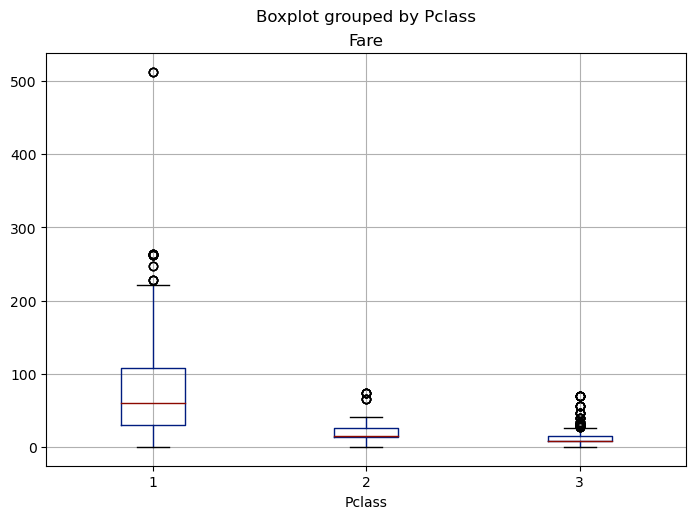

In [894]:
plt.figure(figsize=(15,5))
train_df.boxplot(column='Fare', by='Pclass')
plt.show()

1 P class tickets need higher fare amounts.

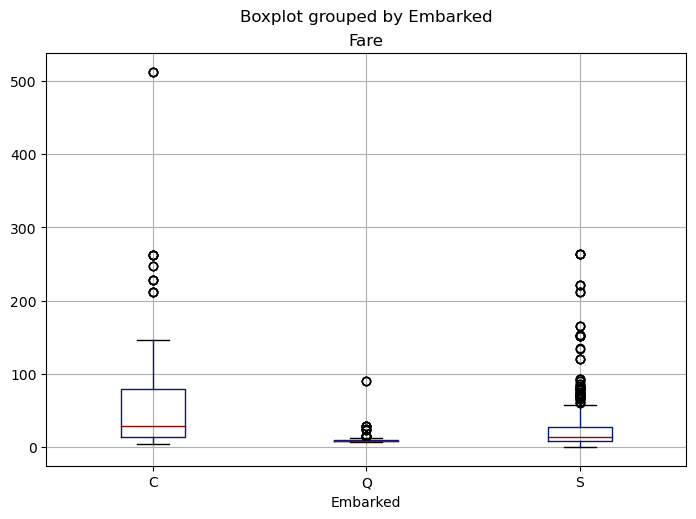

In [895]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

=>>> C embarked has highest fare and so 1 pclass. So, null is filled by "C".

In [896]:
train_df['Embarked']= train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


# Embarkeds vs Sex, Survived and Fare

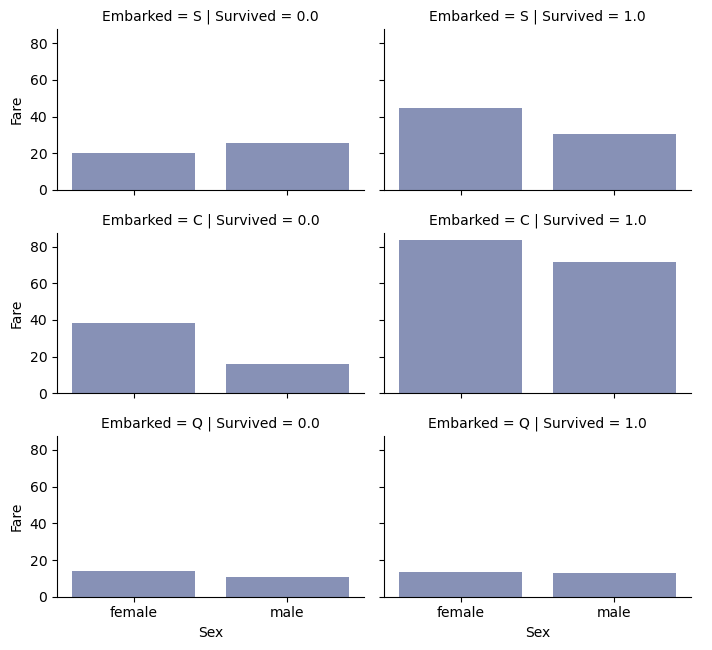

In [897]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

The highest amount of fare is billed for a survived female from C embarked.

# 1.2. Fare missing values

In [898]:
#Fare missing
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1043,nan,3,"Storey, Mr. Thomas",male,60.500000000000000,0,0,nan,S


=>>> Only one null value of Fare have 3.Pclass. So it is filled mean of Fare of 3.Pclass.

In [899]:
print("Mean fare of 3. Pclass is: {} Euro ".format(round(np.mean(train_df[train_df['Pclass']==3]['Fare']),2)))

Mean fare of 3. Pclass is: 13.3 Euro 


In [900]:
train_df['Fare']= train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass']==3]['Fare']))
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [901]:
print('Highest Fare was: {} Euro.'.format(round(train_df['Fare'].max())))
print('Lowest Fare was: {} Euro.'.format(round(train_df['Fare'].min())))
print('Average Fare was: {} Euro.'.format(round(train_df['Fare'].mean())))

Highest Fare was: 512 Euro.
Lowest Fare was: 0 Euro.
Average Fare was: 33 Euro.


# Sex get.dummies

We can use get.dummies method for Sex column

In [902]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C,1,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S,1,0
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S,1,0
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S,0,1


In [903]:
train_df.drop(labels = ["Sex"], axis = 1, inplace = True)

# Embarked get.dummies

In [904]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Embarked"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0.000000000000000,3,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1
4,0.000000000000000,3,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1


# 1.3. Age missing values

In [905]:
#Age missing
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
5,0.000000000000000,3,"Moran, Mr. James",nan,0,0,8.458299999999999,Q,0,1,0,1,0
17,1.000000000000000,2,"Williams, Mr. Charles Eugene",nan,0,0,13.000000000000000,S,0,1,0,0,1
19,1.000000000000000,3,"Masselmani, Mrs. Fatima",nan,0,0,7.225000000000000,C,1,0,1,0,0
26,0.000000000000000,3,"Emir, Mr. Farred Chehab",nan,0,0,7.225000000000000,C,0,1,1,0,0
28,1.000000000000000,3,"O'Dwyer, Miss. Ellen ""Nellie""",nan,0,0,7.879200000000000,Q,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,nan,3,"Riordan, Miss. Johanna Hannah""""",nan,0,0,7.720800000000000,Q,1,0,0,1,0
1301,nan,3,"Naughton, Miss. Hannah",nan,0,0,7.750000000000000,Q,1,0,0,1,0
1304,nan,3,"Spector, Mr. Woolf",nan,0,0,8.050000000000001,S,0,1,0,0,1
1307,nan,3,"Ware, Mr. Frederick",nan,0,0,8.050000000000001,S,0,1,0,0,1


=>>> We can fill age with mean value of groupby Pclass and SibSp columns. Because correlation factors are the most these two variables between Age.

In [906]:
train_df['Age'] = train_df['Age'].groupby([train_df['Pclass'], train_df['SibSp']]).apply(lambda x: x.fillna(x.mean()))

In [907]:
train_df.Age.isnull().sum()

0

# Pclass get dummies

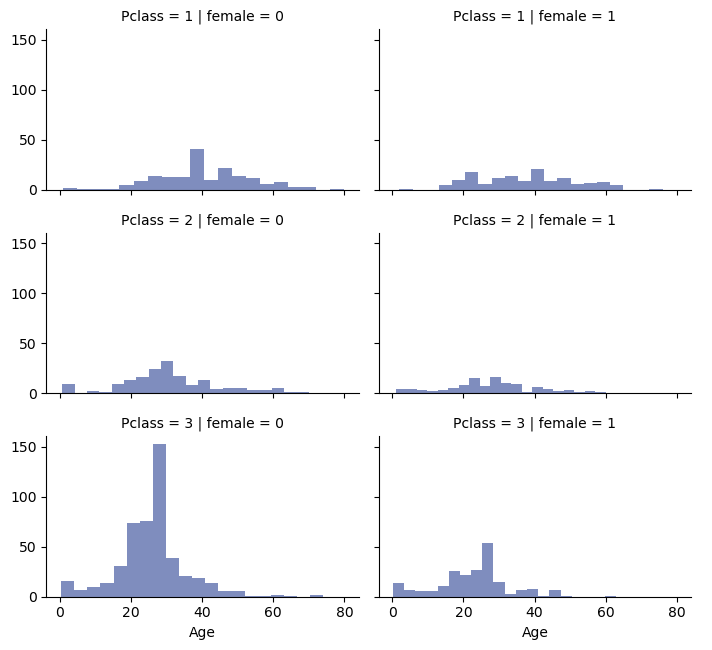

In [908]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='female', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [909]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Pclass"])], axis=1)

In [910]:
train_df.drop(labels = ["Pclass"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1,0,0,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0,1,0,0
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1,0,0,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1,1,0,0
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1


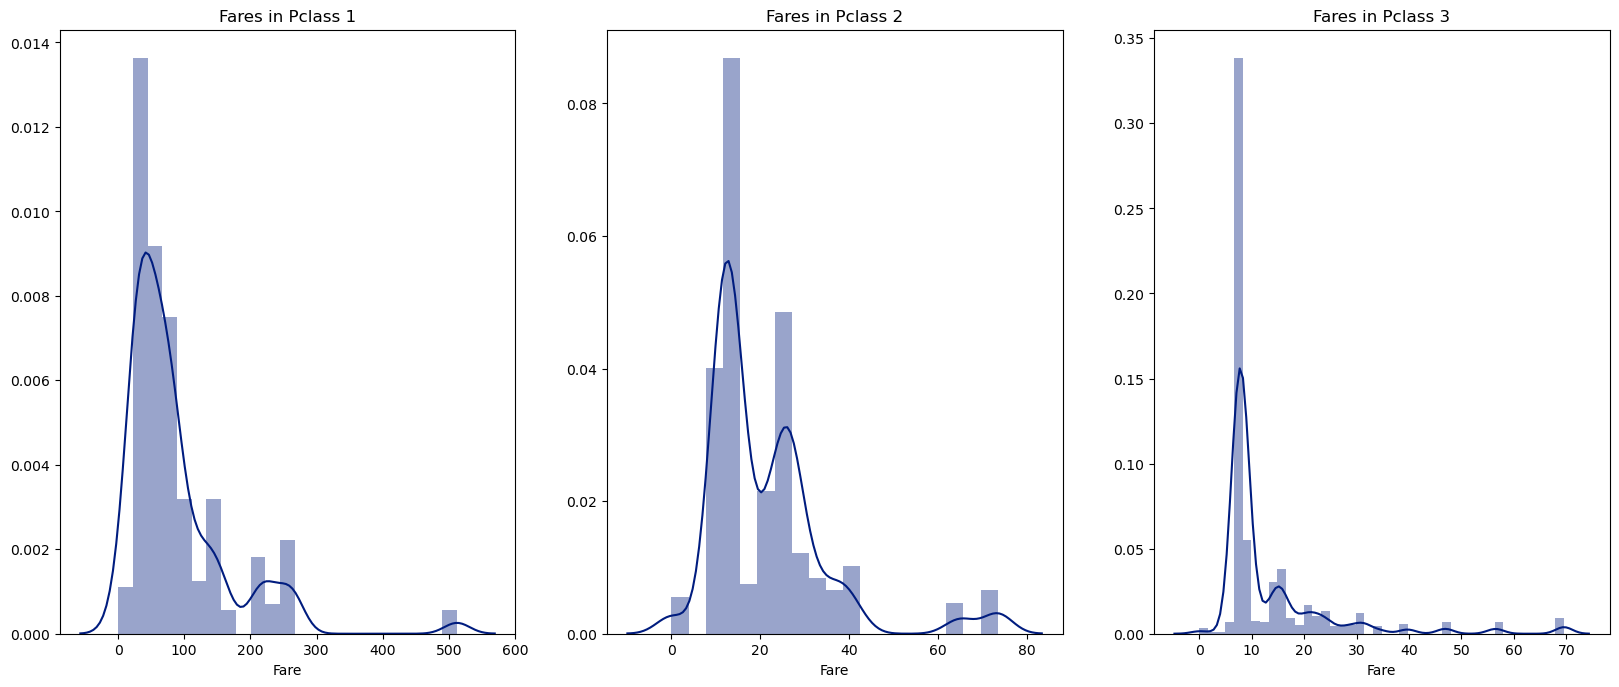

In [911]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df[1]==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df[2]==1].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df[3]==1].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [912]:
print("{} Euro is mean amount of fare for 1.Pclass".format(np.median(train_df[train_df[1]==1].Fare)))
print("{} Euro is mean amount of fare for 2.Pclass".format(round(np.median(train_df[train_df[2]==1].Fare))))
print("{} Euro is mean amount of fare for 3.Pclass".format(np.median(train_df[train_df[3]==1].Fare)))

60.0 Euro is mean amount of fare for 1.Pclass
15.0 Euro is mean amount of fare for 2.Pclass
8.05 Euro is mean amount of fare for 3.Pclass


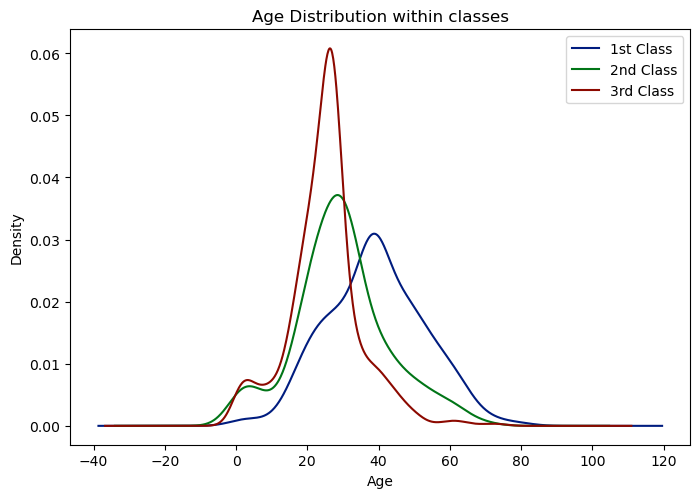

In [913]:
train_df.Age[train_df[1] == 1].plot(kind='kde')    
train_df.Age[train_df[2] == 1].plot(kind='kde')
train_df.Age[train_df[3] == 1].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

# Creating new column as **Alone**, with SibSp and Parch columns:

In [914]:
for i in range(1309):
    withme[i]=train_df["SibSp"][i] + train_df["Parch"][i]
withme.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [915]:
train_df["Withme"]= withme

In [916]:
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3,Withme
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1,0,0,1,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0,1,0,0,1
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1,0,0,1,0
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1,1,0,0,1
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,0


In [917]:
def make_discrete(Withme):
    if Withme < 1:
        return 1
    else:
        return 0
train_df['alone'] = train_df["Withme"].apply(make_discrete)
train_df.groupby("alone")["Withme"].count()

alone
0    519
1    790
Name: Withme, dtype: int64

=>>> 790 people are alone.

So, we can drop Withme, SibSp and Parch columns.

In [918]:
train_df.drop(labels = ["Withme"], axis = 1, inplace = True)

In [919]:
#train_df.drop(labels = ["SibSp"], axis = 1, inplace = True)
#train_df.head()

# Modifying Name column as **Miss,Mrs, and Others prefix.**

In [920]:
train_df["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

In [921]:
train_df["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [922]:
other_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']
train_df.replace(other_titles, "Others", inplace=True)
train_df.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

In [923]:
train_df

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3,alone
0,0.000000000000000,Mr,22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1,0,0,1,0
1,1.000000000000000,Mrs,38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0,1,0,0,0
2,1.000000000000000,Miss,26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1,0,0,1,1
3,1.000000000000000,Mrs,35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1,1,0,0,0
4,0.000000000000000,Mr,35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1
1305,nan,Others,39.000000000000000,0,0,108.900000000000006,C,1,0,1,0,0,1,0,0,1
1306,nan,Mr,38.500000000000000,0,0,7.250000000000000,S,0,1,0,0,1,0,0,1,1
1307,nan,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1


# 1.4. Survived missing values

In [924]:
#Survived values missing:
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3,alone
891,nan,Mr,34.500000000000000,0,0,7.829200000000000,Q,0,1,0,1,0,0,0,1,1
892,nan,Mrs,47.000000000000000,1,0,7.000000000000000,S,1,0,0,0,1,0,0,1,0
893,nan,Mr,62.000000000000000,0,0,9.687500000000000,Q,0,1,0,1,0,0,1,0,1
894,nan,Mr,27.000000000000000,0,0,8.662500000000000,S,0,1,0,0,1,0,0,1,1
895,nan,Mrs,22.000000000000000,1,1,12.287500000000000,S,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1
1305,nan,Others,39.000000000000000,0,0,108.900000000000006,C,1,0,1,0,0,1,0,0,1
1306,nan,Mr,38.500000000000000,0,0,7.250000000000000,S,0,1,0,0,1,0,0,1,1
1307,nan,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1


In [925]:
#Survived missing corralated highly with Pclass
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3,alone
891,nan,Mr,34.500000000000000,0,0,7.829200000000000,Q,0,1,0,1,0,0,0,1,1
892,nan,Mrs,47.000000000000000,1,0,7.000000000000000,S,1,0,0,0,1,0,0,1,0
893,nan,Mr,62.000000000000000,0,0,9.687500000000000,Q,0,1,0,1,0,0,1,0,1
894,nan,Mr,27.000000000000000,0,0,8.662500000000000,S,0,1,0,0,1,0,0,1,1
895,nan,Mrs,22.000000000000000,1,1,12.287500000000000,S,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1
1305,nan,Others,39.000000000000000,0,0,108.900000000000006,C,1,0,1,0,0,1,0,0,1
1306,nan,Mr,38.500000000000000,0,0,7.250000000000000,S,0,1,0,0,1,0,0,1,1
1307,nan,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1


In [926]:
train_df.corr()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3,alone
Survived,1.000000000000000,-0.047523400120892,-0.035322498885736,0.081629407083482,0.257306522384962,0.543351380657753,-0.543351380657753,0.174717533563976,0.003650382683972,-0.155660273404395,0.285903767783740,0.093348572411928,-0.322308357372969,-0.203367085699890
Age,-0.047523400120892,1.000000000000000,-0.254043335817594,-0.150416762511654,0.186194825820703,-0.061266185449989,0.061266185449989,0.088911363556969,-0.053728299327575,-0.044435779807678,0.421188562987373,0.004760687019454,-0.368335442970047,0.138082678334339
SibSp,-0.035322498885736,-0.254043335817594,1.000000000000000,0.373587190626489,0.160356529873317,0.109609039409485,-0.109609039409485,-0.050068350035178,-0.048677676138908,0.075197653405560,-0.034256413258901,-0.052418503490258,0.072610343632441,-0.591076967144532
Parch,0.081629407083482,-0.150416762511654,0.373587190626489,1.000000000000000,0.221640660153901,0.213125461206777,-0.213125461206777,-0.010287396127709,-0.100943300027417,0.073258386975031,-0.013032696181890,-0.010056955947492,0.019520705339832,-0.549021549929854
Fare,0.257306522384962,0.186194825820703,0.160356529873317,0.221640660153901,1.000000000000000,0.185692745192877,-0.185692745192877,0.288996745675701,-0.129951612316641,-0.172838933062402,0.600090636252050,-0.121212054773774,-0.419864184895372,-0.275049520176197
female,0.543351380657753,-0.061266185449989,0.109609039409485,0.213125461206777,0.185692745192877,1.000000000000000,-1.000000000000000,0.071447339251647,0.088651209315401,-0.119503981455040,0.107370660783326,0.028862225069199,-0.116562114328948,-0.284537371659577
male,-0.543351380657753,0.061266185449989,-0.109609039409485,-0.213125461206777,-0.185692745192877,-1.000000000000000,1.000000000000000,-0.071447339251647,-0.088651209315401,0.119503981455040,-0.107370660783326,-0.028862225069199,0.116562114328948,0.284537371659577
C,0.174717533563976,0.088911363556969,-0.050068350035178,-0.010287396127709,0.288996745675701,0.071447339251647,-0.071447339251647,1.000000000000000,-0.164932136593370,-0.779057699099776,0.331414311627430,-0.136259758760313,-0.175056990386653,-0.104527821549152
Q,0.003650382683972,-0.053728299327575,-0.048677676138908,-0.100943300027417,-0.129951612316641,0.088651209315401,-0.088651209315401,-0.164932136593370,1.000000000000000,-0.489874418835284,-0.166101161497400,-0.121973145468764,0.243706206663841,0.127214262734908
S,-0.155660273404395,-0.044435779807678,0.075197653405560,0.073258386975031,-0.172838933062402,-0.119503981455040,0.119503981455040,-0.779057699099776,-0.489874418835284,1.000000000000000,-0.187353001407358,0.197972896313348,-0.000181170699130,0.011527224566773


Female and 1.Pclass have the most correlation with Survived. So, we groupby 1.Pclass and female and calculate median than filled for survived.

In [927]:
train_df['Survived'] = train_df['Survived'].groupby([train_df[1], train_df['female']]).apply(lambda x: x.fillna(x.median()))

In [928]:
train_df["Survived"].isnull().sum()

0

In [929]:
train_df.isnull().sum()

Survived    0
Name        0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
female      0
male        0
C           0
Q           0
S           0
1           0
2           0
3           0
alone       0
dtype: int64

=>>> So There is no null value anymore.

# Visualize

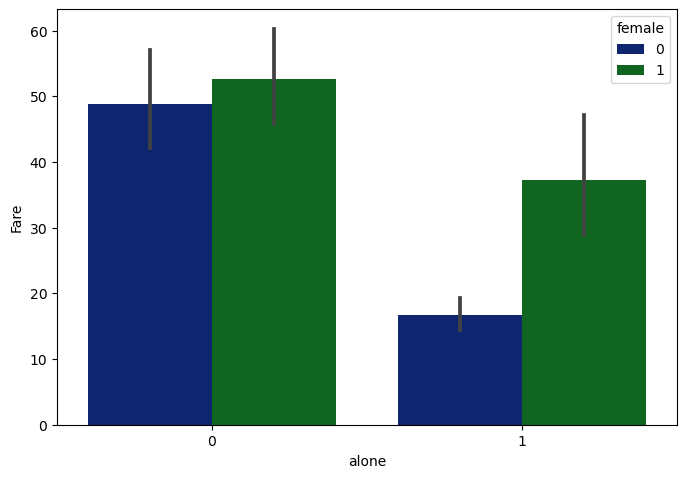

In [930]:
sns.barplot(x="alone", y="Fare", data=train_df, hue = 'female')
plt.show()

In [931]:
#plt.figure(figsize=(5,3), dpi = 300)
#sns.scatterplot(x="Age", y="Fare", data=train_df, hue = 'Sex')

In [932]:
#plt.figure(figsize=(5,3), dpi = 200)
#a = sns.scatterplot(x="Fare", y="Embarked", data=train_df)
#plt.show()

# Age and Female for 1.Pclass and 3. Pclass

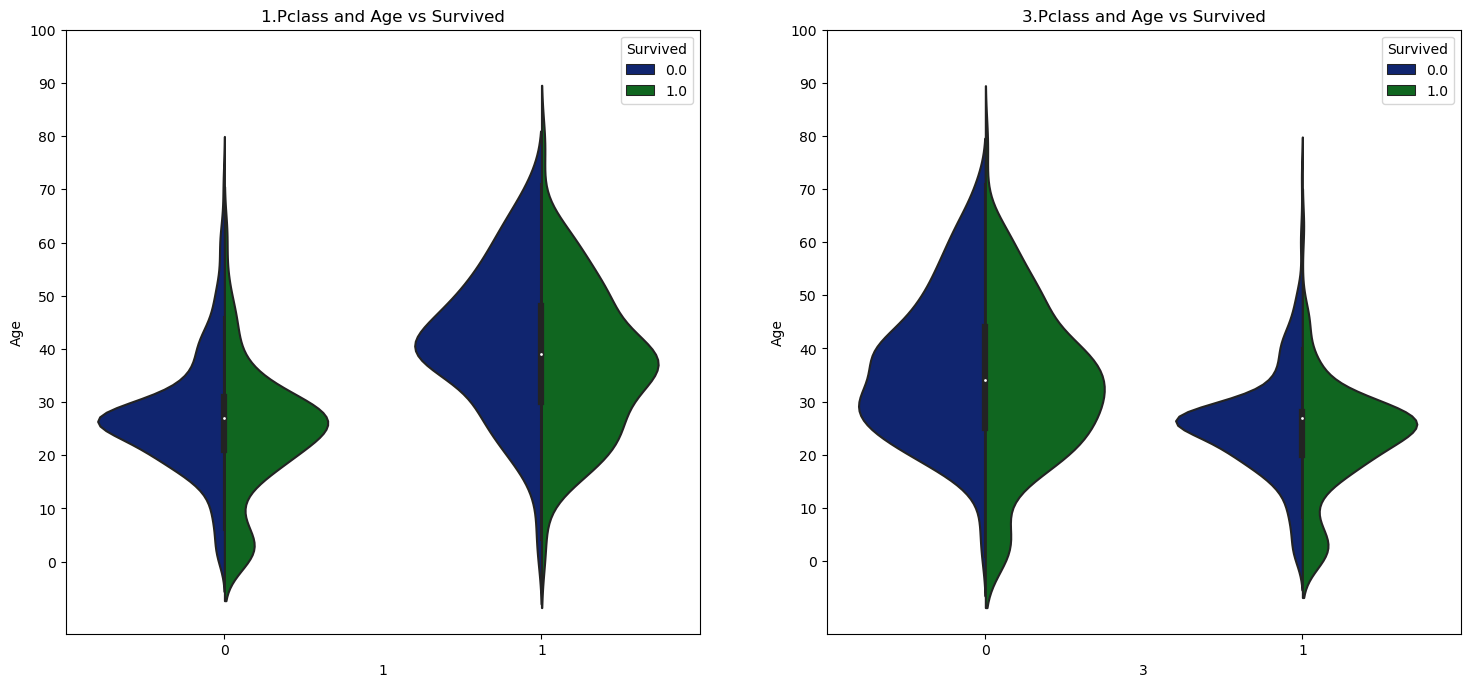

In [933]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(1,"Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('1.Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(3,"Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('3.Pclass and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Age distribution of survived or died people in Pclasses:

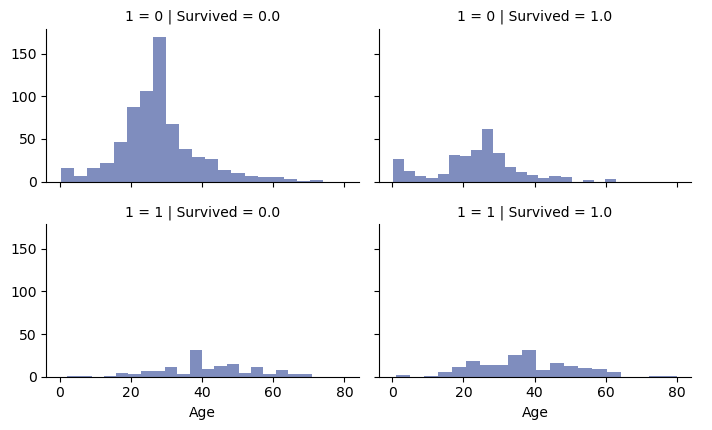

In [934]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row=1, size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**UNIVARIATE ANALYSIS**

**Visualization with Univariate Data**\
Visualization of the Numerical Variables

# Visualization with Univariate Data: Age and Fare dist. and log transformed

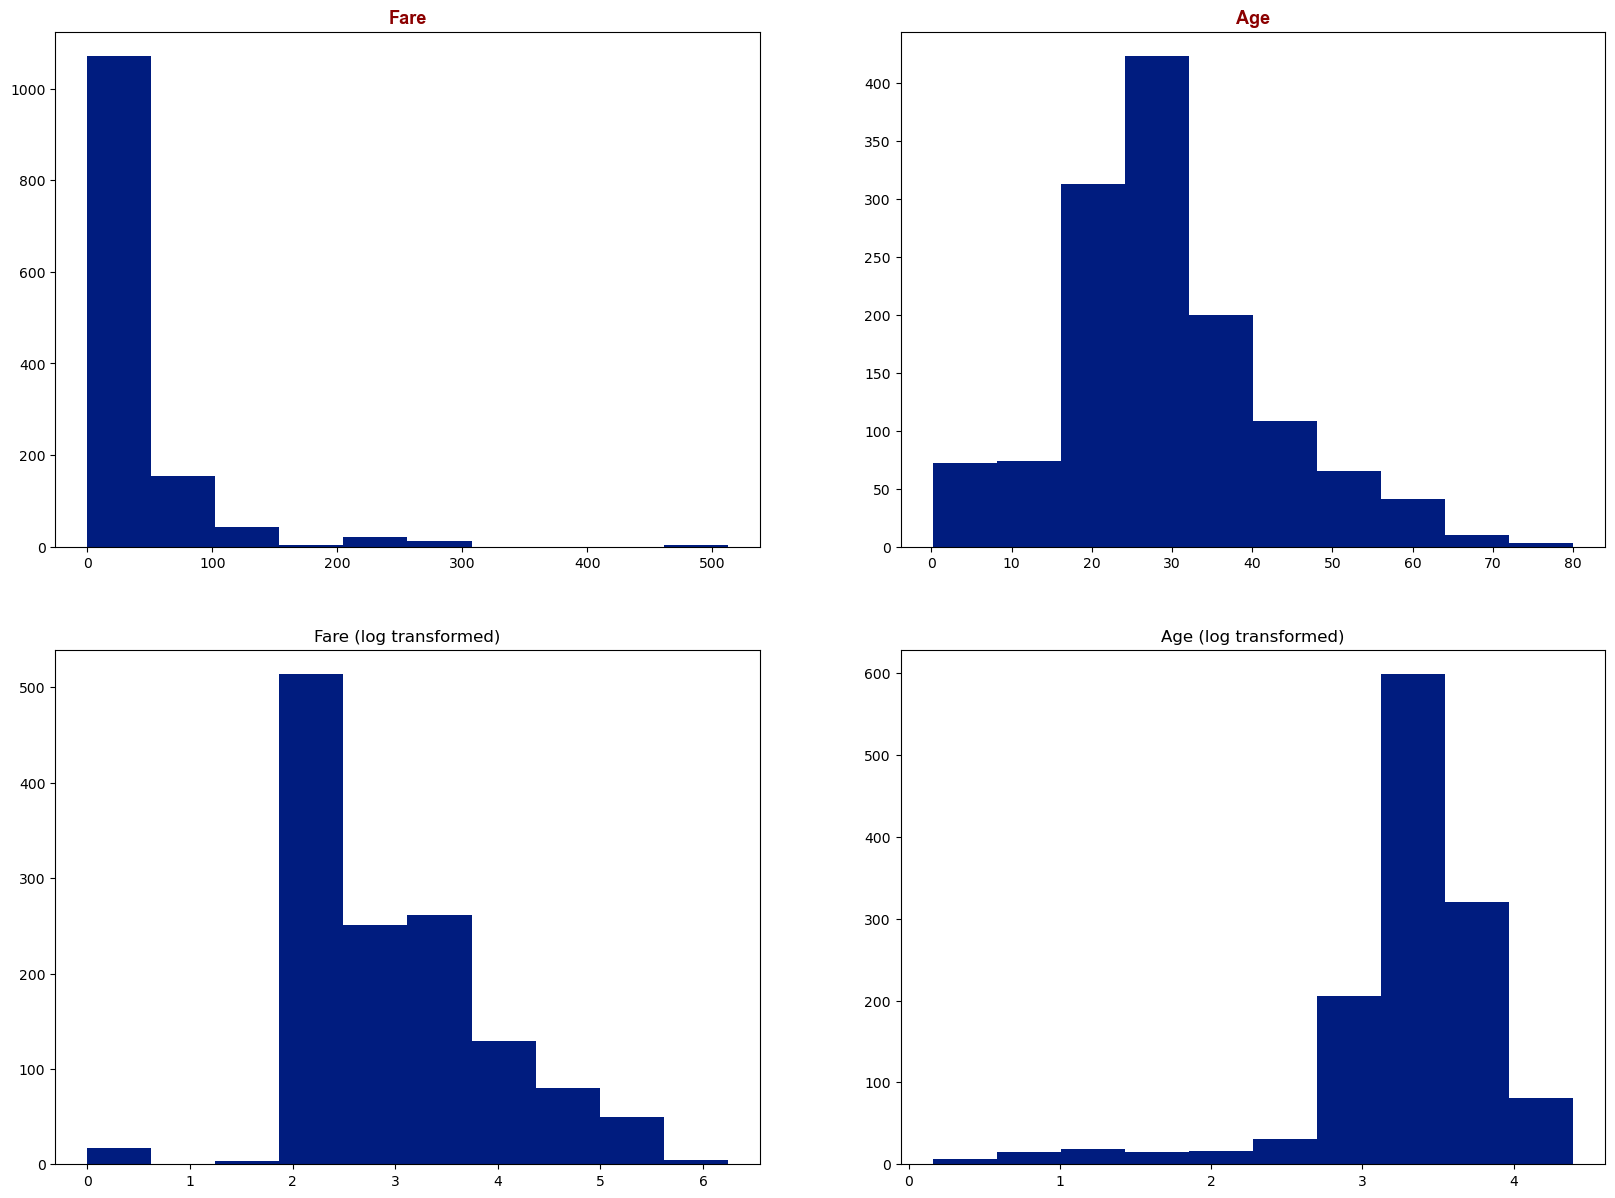

In [935]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['Fare', 'Age']
winsorize_variables= ['Fare', 'Age']
plt.figure(figsize=(20,15))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(train_df[variables[i]])
    plt.title(variables[i], fontdict=title_font)

for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(np.log(train_df[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

# Visualization of Categorical Variables

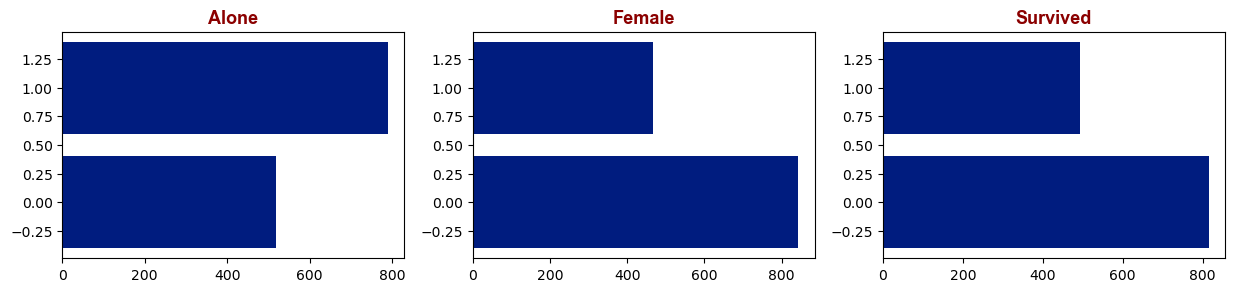

In [936]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.barh(train_df.groupby("alone")["alone"].count().index, 
        train_df.groupby("alone")["alone"].count())
plt.title("Alone", fontdict=title_font)
plt.subplot(1,3,2)
plt.barh(train_df.groupby("female")["female"].count().index, 
        train_df.groupby("female")["female"].count())
plt.title("Female", fontdict=title_font)
plt.subplot(1,3,3)
plt.barh(train_df.groupby("Survived")["Survived"].count().index, 
        train_df.groupby("Survived")["Survived"].count())
plt.title("Survived", fontdict=title_font)

plt.show()

In [937]:
#!pip install wordcloud

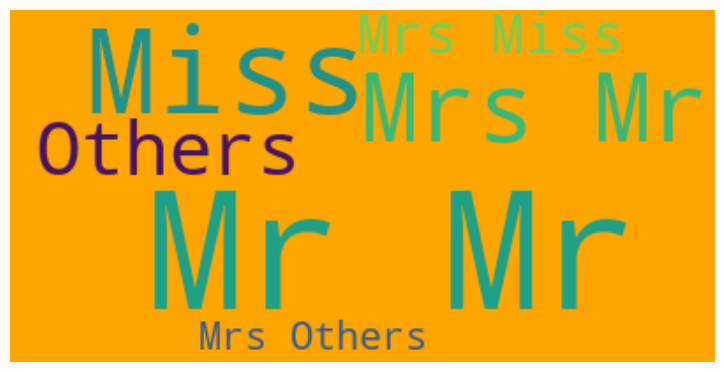

In [938]:
from wordcloud import WordCloud
categories=['Name']
plt.figure(figsize=(20,10))
for i, category in enumerate(categories):
    plt.subplot(1,2,i+1)
    wordcloud = WordCloud(background_color="orange").generate(" ".join(train_df[category].dropna()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

#  Bivariate Analysis of Two Continuous Variables Fare vs Age and Female

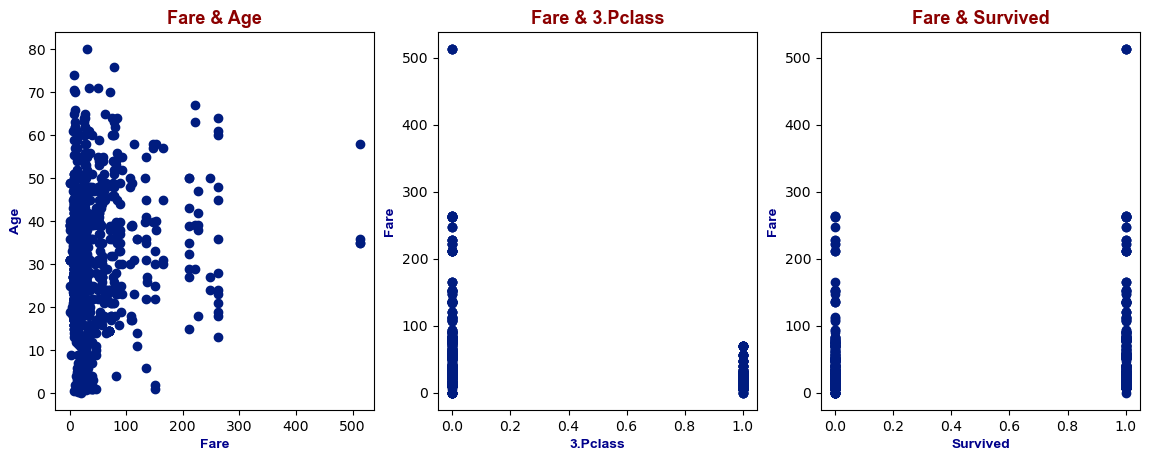

In [939]:
plt.figure(figsize=(14,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(train_df["Fare"], train_df["Age"])
plt.title("Fare & Age", fontdict=title_font)
plt.xlabel('Fare', fontdict=axis_font )
plt.ylabel('Age', fontdict=axis_font )
plt.subplot(1,3,2)
plt.scatter(train_df[3], train_df["Fare"])
plt.title("Fare & 3.Pclass", fontdict=title_font)
plt.xlabel('3.Pclass', fontdict=axis_font )
plt.ylabel('Fare', fontdict=axis_font )
plt.subplot(1,3,3)
plt.scatter(train_df["Survived"], train_df["Fare"])
plt.title("Fare & Survived", fontdict=title_font)
plt.xlabel('Survived', fontdict=axis_font )
plt.ylabel('Fare', fontdict=axis_font )
plt.show()

0-10 years people do not pay more then 150 euro for ticket. On the other hand, 500 euro of ticket is belong for apporoximately 35 and 67 years old passengers.

3.Pclass passengers has less fare of ticket.

Small group of survived people has the most fare.

# Bivariate Analysis of Two Categoric Variables: Survived and Female

In [940]:
color_rating = pd.crosstab(train_df.Survived, train_df.female)
color_rating

female,0,1
Survived,,
0.000000000000000,734,81
1.000000000000000,109,385


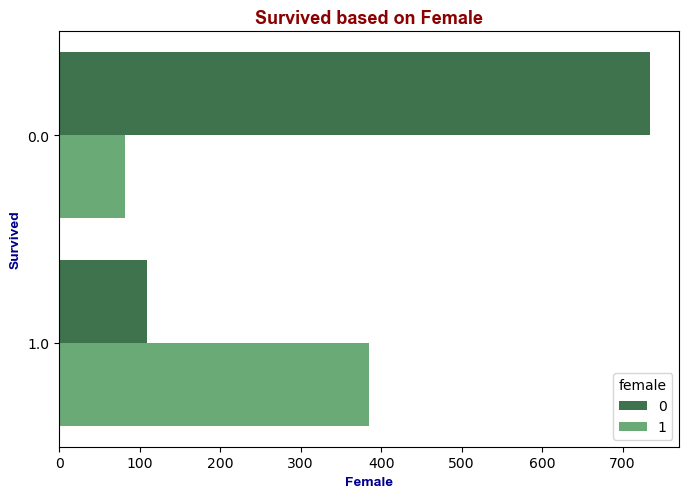

In [941]:
sns.countplot(y="Survived", hue="female", data=train_df, palette="Greens_d")
plt.title("Survived based on Female", fontdict = title_font)
plt.ylabel("Survived", fontdict = axis_font)
plt.xlabel("Female", fontdict = axis_font)
plt.show()

# Outlier Detection

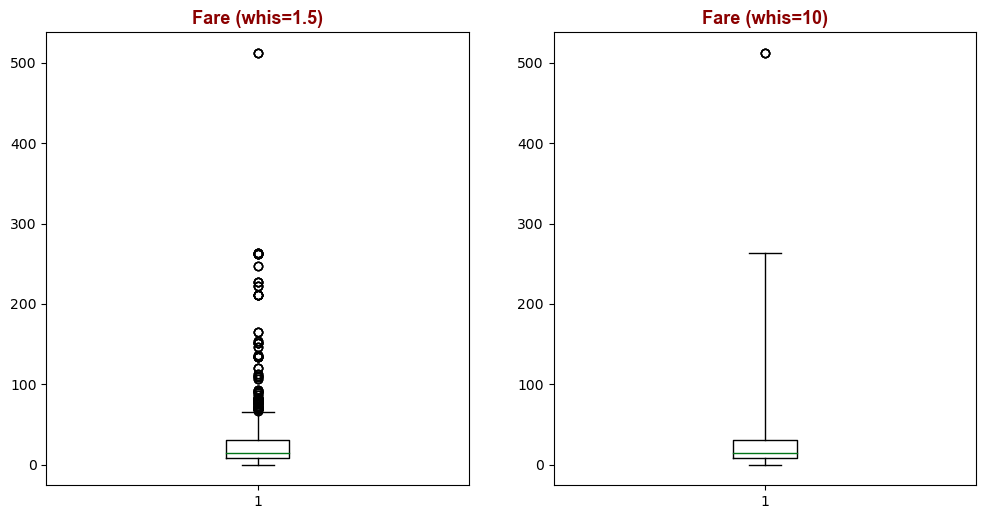

In [942]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(train_df.Fare.dropna())
plt.title("Fare (whis=1.5)", fontdict=title_font)
plt.subplot(1,2,2)
plt.boxplot(train_df.Fare.dropna(), whis=10)
plt.title("Fare (whis=10)", fontdict=title_font)
plt.show()

The number of outliers has decreased in right graph, because we kept the threshold quite high. 

In [943]:
from scipy.stats import zscore

z_scores = zscore(train_df["Fare"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 100
------
Threshold value: 2
Number of Outliers: 56
------
Threshold value: 3
Number of Outliers: 38
------
Threshold value: 4
Number of Outliers: 20
------


When the threshold values of z-score increases, number of outliers decreases. 

# Classifying the Outliers

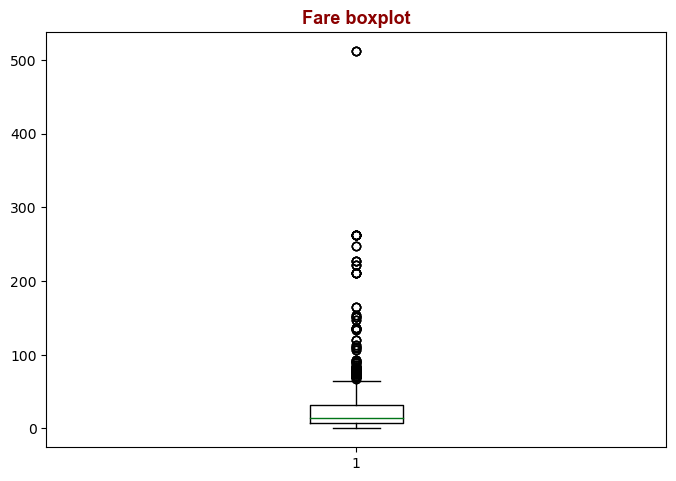

In [944]:
plt.boxplot(train_df.Fare.dropna())
plt.title("Fare boxplot", fontdict=title_font)
plt.show()

In [945]:
from scipy.stats.mstats import winsorize

winsorizing= winsorize(np.array(train_df.Fare.dropna()), (0.10, 0.10))
winsorizing

masked_array(data=[ 7.55  , 71.2833,  7.925 , ...,  7.55  ,  8.05  ,
                   22.3583],
             mask=False,
       fill_value=1e+20)

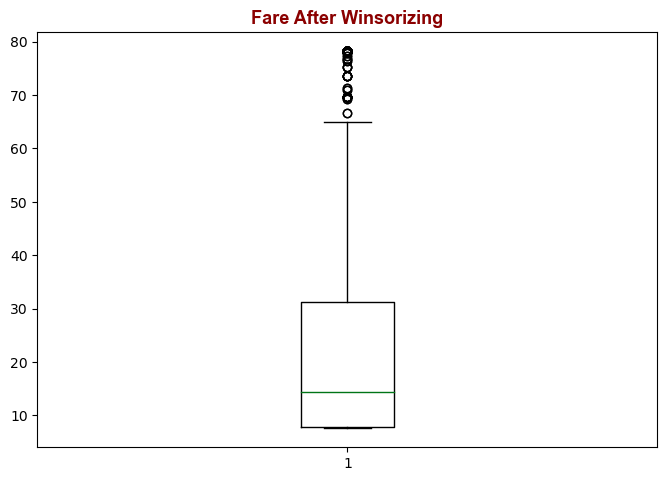

In [946]:
plt.boxplot(winsorizing)
plt.title("Fare After Winsorizing", fontdict=title_font)
plt.show()

In [947]:
np.percentile(train_df.Fare.dropna(),[10,90])

array([ 7.57   , 78.01998])

The 10% of the lowest value (i.e., values lower than 7.57) and the 10% of the highest values (i.e., values larger than 78.01998) are replaced. 

# t-test

In [948]:
train_df.dropna(inplace=True)

In [949]:
# Test whether group differences are significant.
train_dfs = train_df["Survived"].unique()
grup_train = train_df.groupby("Survived")

In [950]:
from scipy.stats import ttest_ind
ttest_value = ttest_ind(train_df.Survived, train_df.female, equal_var=False)
print(ttest_value)

Ttest_indResult(statistic=1.135418604776197, pvalue=0.25630399786321334)


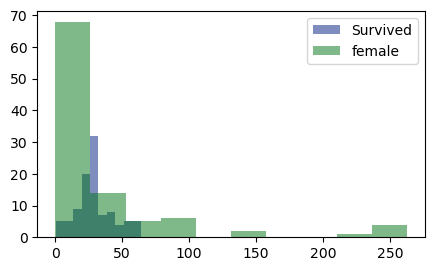

In [951]:
plt.figure(figsize=(5,3))

AGE = np.random.choice(train_df.Age, 100, replace=True)
FARE = np.random.choice(train_df.Fare, 100, replace=True)

plt.hist(AGE, alpha=0.5, label='Survived') 
plt.hist(FARE, alpha=0.5, label='female') 
plt.legend(loc='upper right') 
plt.show()

In [952]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["Fare", "Age"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(train_dfs)):
        for j in range(i+1, len(train_dfs)):
            ttest = stats.ttest_ind(train_df[train_df["alone"]==train_dfs[i]][var], 
                                train_df[train_df["alone"]==train_dfs[j]][var])
            group_1 = train_dfs[i]
            group_2 = train_dfs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison Fare

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,10.342630003669482,0.000000000000000


For the sake of comparison Age

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,-5.040310427739530,0.000000530019018


**Correlation Coefficient**

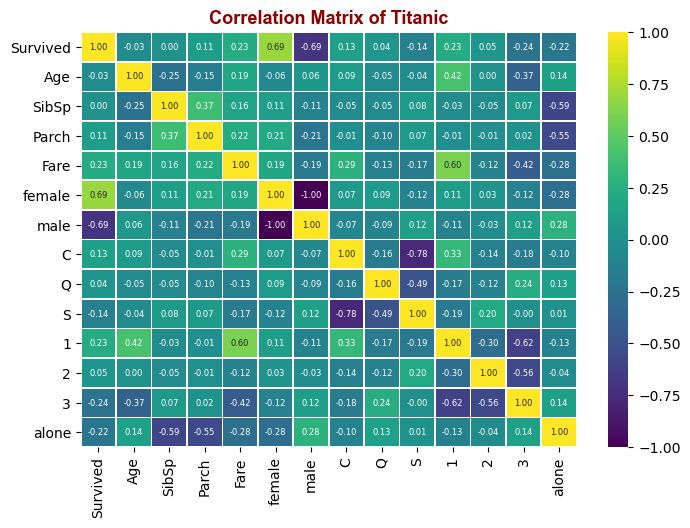

In [953]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()

In [954]:
train_df

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3,alone
0,0.000000000000000,Mr,22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1,0,0,1,0
1,1.000000000000000,Mrs,38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0,1,0,0,0
2,1.000000000000000,Miss,26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1,0,0,1,1
3,1.000000000000000,Mrs,35.000000000000000,1,0,53.100000000000001,S,1,0,0,0,1,1,0,0,0
4,0.000000000000000,Mr,35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.000000000000000,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1
1305,1.000000000000000,Others,39.000000000000000,0,0,108.900000000000006,C,1,0,1,0,0,1,0,0,1
1306,0.000000000000000,Mr,38.500000000000000,0,0,7.250000000000000,S,0,1,0,0,1,0,0,1,1
1307,0.000000000000000,Mr,27.055310734463276,0,0,8.050000000000001,S,0,1,0,0,1,0,0,1,1


In [955]:
train_df.drop(labels =["SibSp", "Parch", "Embarked","Name","C",1], axis = 1, inplace = True)

In [956]:
train_df.Age=train_df.Age.astype(int) 

In [957]:
for i in range(len(train_df.index)):
    if train_df.Age[i]<20:
        train_df.Age[i]=0
    elif train_df.Age[i]>=20 and train_df.Age[i]<45:
        train_df.Age[i]=1
    else:
        train_df.Age[i]=2

In [958]:
for i in range(len(train_df.index)):
    if train_df.Fare[i]<20:
        train_df.Fare[i]=0
    elif train_df.Fare[i]>=30 and train_df.Fare[i]<45:
        train_df.Fare[i]=1
    else:
        train_df.Fare[i]=2

In [959]:
train_df.head()

,Survived,Age,Fare,female,male,Q,S,2,3,alone
0,0.000000000000000,1,0.000000000000000,0,1,0,1,0,1,0
1,1.000000000000000,1,2.000000000000000,1,0,0,0,0,0,0
2,1.000000000000000,1,0.000000000000000,1,0,0,1,0,1,1
3,1.000000000000000,1,2.000000000000000,1,0,0,1,0,0,0
4,0.000000000000000,1,0.000000000000000,0,1,0,1,0,1,1
